In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from londonbss.ml_logic.main import preprocess, train, evaluate
from londonbss.ml_logic.features  import get_raw_features
from londonbss.ml_logic.registry import load_model
from londonbss.ml_logic.preproc import fit_transform_features
from londonbss.ml_logic.model import test_adf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from londonbss.params import *
from londonbss.ml_logic.currentstatus import get_status


Loading TensorFlow...

✅ TensorFlow loaded (3.35s)


In [ ]:
stations = ["hop_exchange__the_borough",
"st_jamess_square__st_jamess",
"holborn_circus__holborn",
"queen_street_1__bank",
"brushfield_street__liverpool_street",
"whitehall_place__strand",
"soho_square___soho",
"newgate_street___st_pauls",
"queen_street_2__bank",
"st_bride_street__holborn",
"william_iv_street__strand",
"green_park_station__mayfair",
"jubilee_gardens__south_bank",
"little_argyll_street__west_end",
"pall_mall_east__west_end",
"cheapside__bank",
"finsbury_circus__liverpool_street",
"waterloo_station_2__waterloo",
"lancaster_gate___bayswater",
"boston_place__marylebone",
"cloudesley_road__angel",
"knightsbridge__hyde_park",
"bayswater_road__hyde_park",
"wenlock_road___hoxton",
"eagle_wharf_road__hoxton",
"macclesfield_rd__st_lukes",
"st_johns_wood_church__the_regents_park",
"doric_way___somers_town",
"notting_hill_gate_station__notting_hill",
"claremont_square__angel",
"st_johns_wood_road__st_johns_wood",
"river_street___clerkenwell",
"city_road__angel",
"hardwick_street__clerkenwell"
]

In [72]:
mindate='2018-01-01'
stationselec = 'devonshire_terrace__bayswater',

In [60]:
# y,X = preprocess(min_date=mindate, max_date='2023-01-01')

In [61]:
# for station in stations:
#     print(f'Processing Model from station: {station}')
#     train(min_date=mindate, max_date='2023-01-01',station=station)
#     pred , actual = evaluate(min_date=mindate, max_date='2023-01-01',station=station)
    

In [73]:
y = train(min_date=mindate, max_date='2023-01-01',station=stationselec)


⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (42998, 860)

Load data from local CSV...
Data loaded, with shape (45194, 24)
I'm an exception!


KeyError: "None of [Index([('devonshire_terrace__bayswater',)], dtype='object')] are in the [columns]"

In [63]:
pred , actual = evaluate(min_date=mindate, max_date='2023-01-01',station=stationselec)


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4392, 25)

Evaluating model on 4392 rows...
✅ Model evaluated
✅ evaluate() done



In [74]:
actual = actual.iloc[:-21]

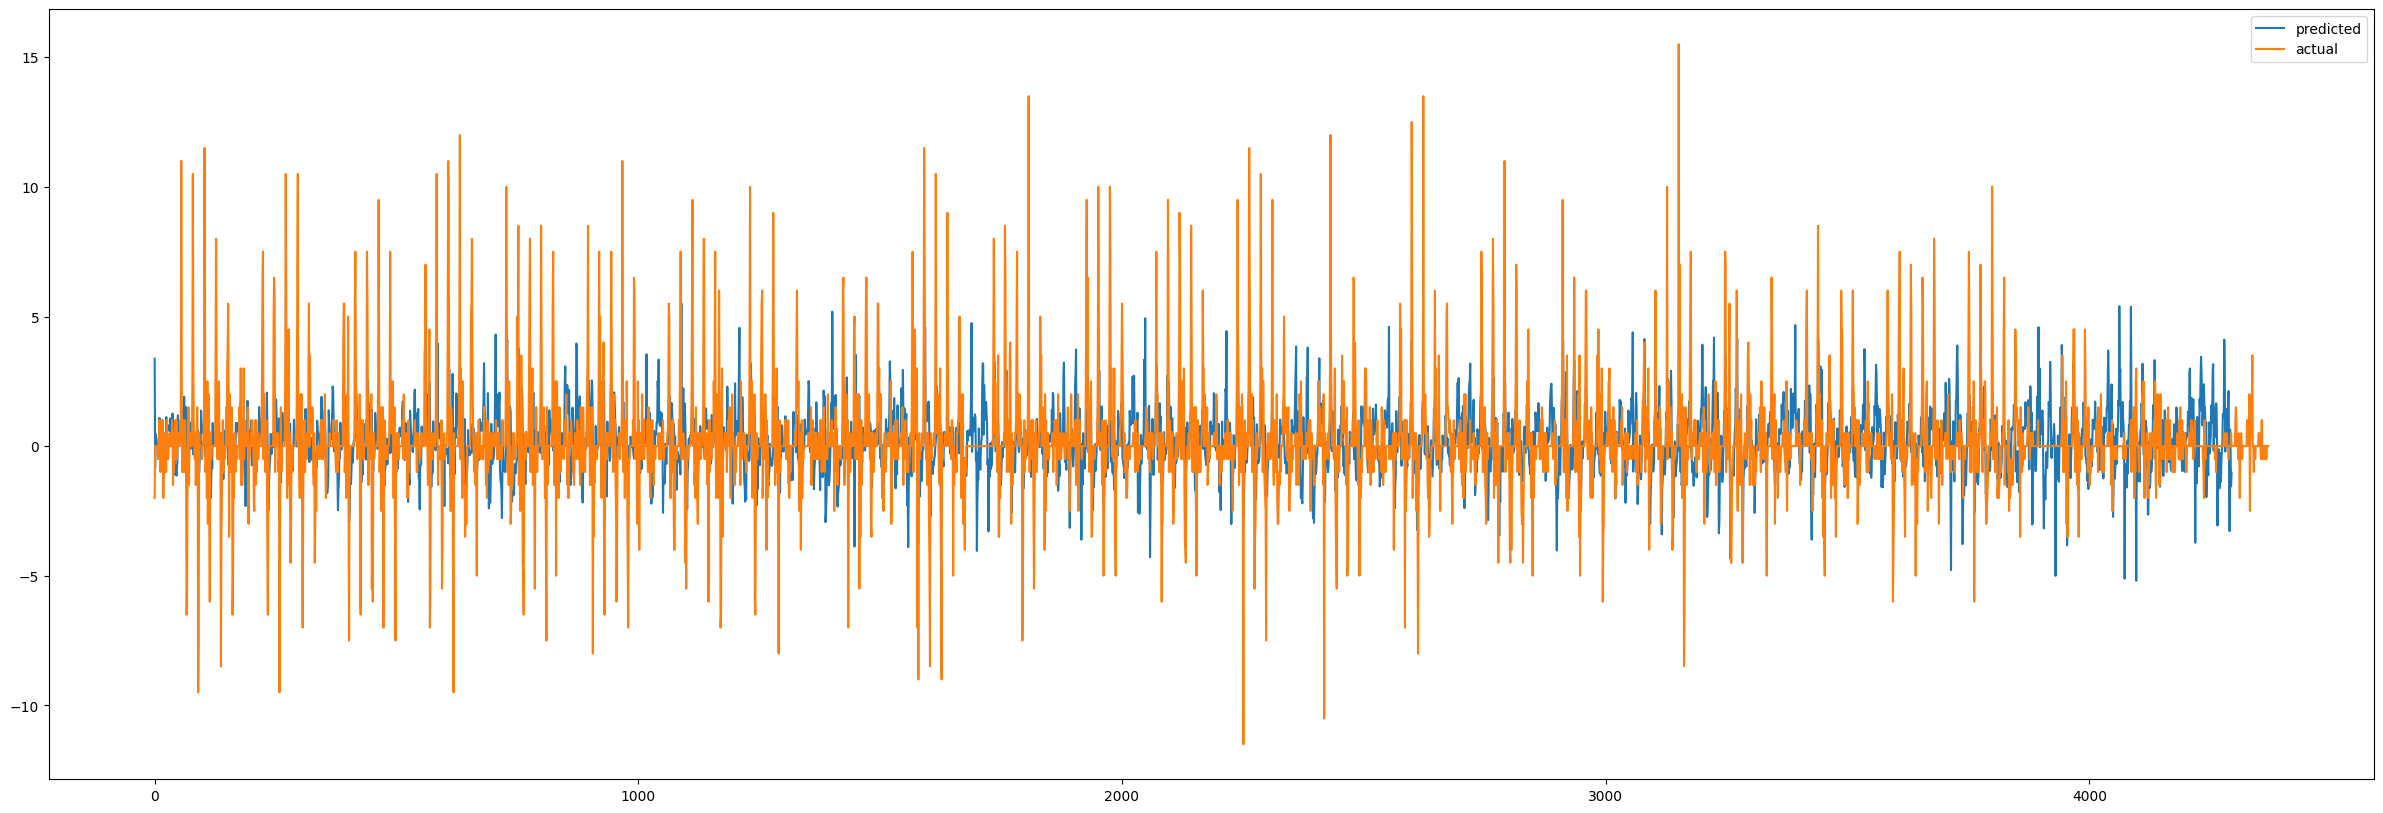

In [75]:
plt.figure(figsize=(30, 10))
plt.plot(pd.DataFrame(pred).reset_index()['predicted_mean'], label='predicted')
plt.plot(actual.reset_index()[actual.columns[0]], label='actual')
plt.legend()

In [53]:
data = get_status()

In [ ]:
data

In [ ]:
stationselec

In [ ]:
df=pd.DataFrame(pred)

In [ ]:
df=df.reset_index()

In [ ]:
df

In [ ]:
df2=df.query('startdate.str.contains("10:00:00")')

In [ ]:
def trans(s):
    return s.strip().lower().replace(',',' ').replace('.','').replace('(','').replace(')','').replace('&','').replace(' ','_').replace("'","")


In [ ]:
trans('River Street , Clerkenwell')

In [ ]:
data['Station_name']=data['Station_name'].apply(lambda s:trans(s))

In [ ]:
data_station = data[data['Station_name']==stationselec]
data_station

In [ ]:
dff = df[df['startdate']>=df2.iloc[-1].startdate]


In [ ]:
dff['predicted_mean'].iloc[0]+= data_station['s_num_bikes']

In [ ]:
dff['available_dock']=data_station['s_num_docks'].iloc[0]-dff['future_bikes']

In [ ]:
for i in range(len(dff)):
    dff['available_dock'].iloc[i]=max(0,dff['available_dock'].iloc[i])

In [ ]:

dff['future_bikes'] = dff['predicted_mean'].cumsum()
dff

In [49]:
dff

NameError: name 'dff' is not defined

In [ ]:
df